# Exercise 4.9

<p align="justify">
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game endswhen the gambler wins by reaching his goal of $100$, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s capital, $s \in \{1,\ 2,\ \ldots,\ 99\}$ and the actions are stakes, $a \in \{0,\ 1,\ \ldots , \min(s,\ 100 - s) \}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is $+1$. The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let $p_{h}$ denote the probability of the coin coming up heads. If $p_{h}$ is known, then the entire problem is known and it can be solved, for instance, by value iteration. This policy is optimal, but not unique. In fact, there is a whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function.
</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

### Settings

In [2]:
goal = 100  # amount of money to reach

const = 1e-9  # rounding constant
gamma = 1.00  # discount rate

thetas = [1e-9]  # accuracy of estimation | [1e-6, 1e-12]

### Initialization

In [3]:
p_h     = None  # probability of winning
policy  = None  # policy for each state
rewards = None  # reward for each state
values  = None  # value for each state

### Functions

In [4]:
def generate_actions(state, goal):
    return list(range(1, min(state, goal-state) + 1))

In [5]:
def initialize():
    global policy, rewards, values
    
    # initialize policy
    policy = np.zeros((goal + 1, 1), dtype=np.int)

    # initialize rewards
    rewards = np.zeros((goal + 1, 1))
#     rewards[-1] = 1

    # initialize state values
    values = np.zeros((goal + 1, 1))
    values[-1] = 1
    
    return

In [6]:
def plot_heatmap():
    plt.figure(figsize=(30, 2))
    sns.heatmap(policy.T, cbar=None, cmap='Blues', vmin=0, vmax=goal, square=True, annot=True)
    plt.show()
    return

In [7]:
def plot_scatter():
    plt.figure(figsize=(16, 9))
    plt.plot(np.arange(goal+1), policy, '.')
    plt.title(f'Final policy (stake) | Theta: {theta}')
    plt.ylim(-1, (goal // 2) + 1)
    plt.xticks(np.arange(0, goal + 1, 5))
    plt.yticks(np.arange(0, (goal // 2) + 1, 5))
    plt.show()
    return

In [8]:
def plot_sweeps(sweeps):
    plt.figure(figsize=(16, 9))
    legend = list()
    
    for i in [0, 1, 2, 15, 31, -1]:
        if i < len(sweeps):
            legend.append(f'Sweep {i+1}')
            plt.plot(np.arange(goal+1), sweeps[i], '--')
        
    plt.legend(legend[:-1] + ['Final'])
    plt.xticks([1, 25, 50, 75, 99])
    plt.title(f'Value estimates | Theta: {theta}')
    plt.show()
    return

In [9]:
def run_value_iter(prob=0.5, final_plot_only=True, print_delta=False):
    initialize()
    
    global p_h

    delta = theta
    p_h = prob
    stable = False
    sweeps = list()

    while delta >= theta or not stable:
        delta, stable = value_iteration()
        sweeps.append(np.copy(values))

        if print_delta:
            print(f'Delta: {delta}')
    
        if not final_plot_only and not stable:
            plot_scatter()            
            plot_heatmap()
        
    plot_scatter()
    plot_heatmap()
    plot_sweeps(sweeps)
    
    return

<hr style="height: 1px;">

### Value iteration

In [10]:
def value_iteration():
    """
    c: current state
    b: number of cars returned
    r: number of cars rented
    """
    global policy, values
    
    delta = 0
    stable = True
    old_values = np.copy(values)
    
    # special-case values (if applicable)
#     values[0]    = 1.00 * (rewards[0]    + gamma * values[0])
#     values[goal] = 1.00 * (rewards[goal] + gamma * values[goal])

    # evaluate states
    for state in range(1, goal):
        best_v = -np.inf
        best_a = policy[state]
        
        for action in generate_actions(state, goal):
            new_value = p_h  * (rewards[state + action] + gamma * values[state + action]) + \
                   (1 - p_h) * (rewards[state - action] + gamma * values[state - action])
            
            if best_v + const <= new_value:
                best_v = new_value
                best_a = action
                
        if policy[state] != best_a:
            policy[state] = best_a
            stable = False
        
        values[state] = best_v
        
    delta = max(delta, np.max(np.abs(old_values - values)))

    return delta, stable

#### $p_{h} = 0.40$

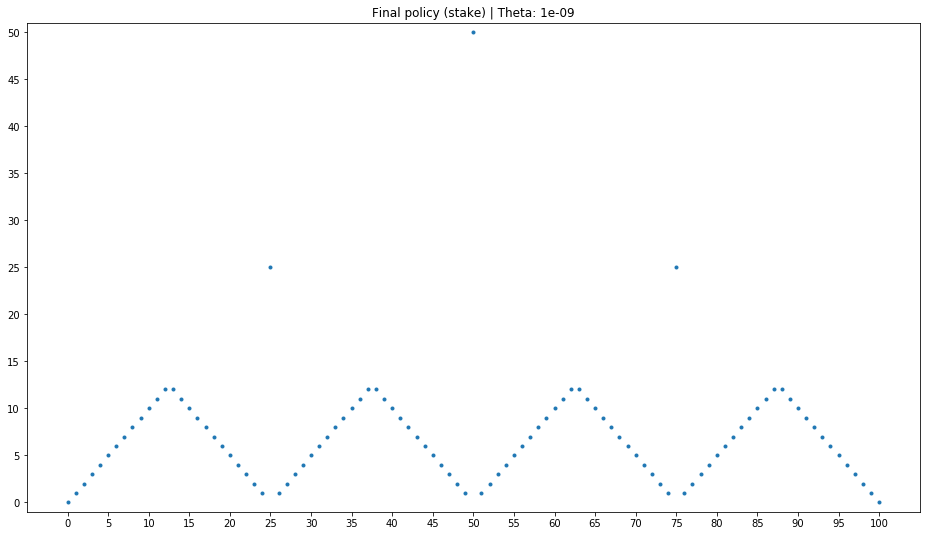

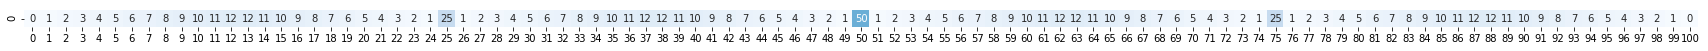

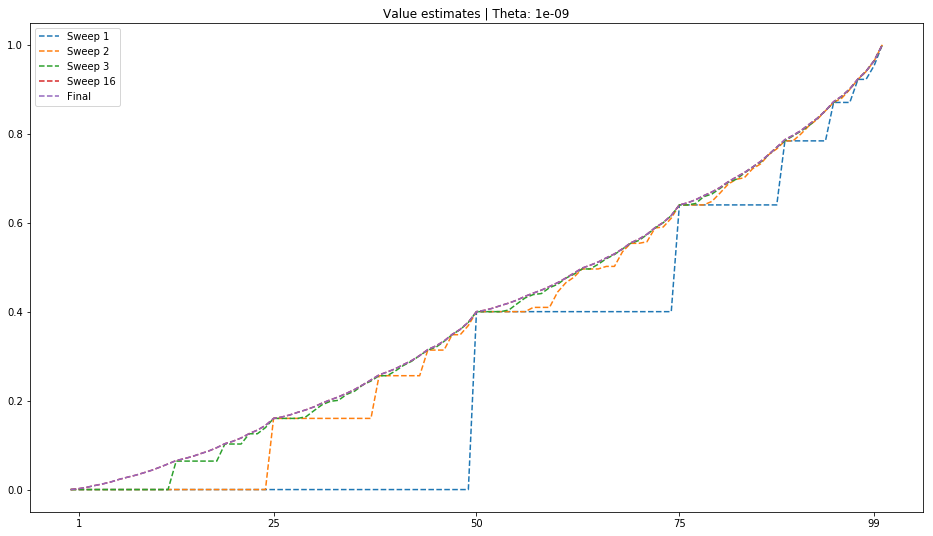

In [11]:
for theta in thetas:
    run_value_iter(prob=0.40)

<p align="justify">
Implement value iteration for the gambler’s problem and solve it for $p_{h} = 0.25$ and $p_{h} = 0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically.
    
<!-- Are your results stable as $\theta \rightarrow 0$? -->
</p>

#### $p_{h} = 0.25$

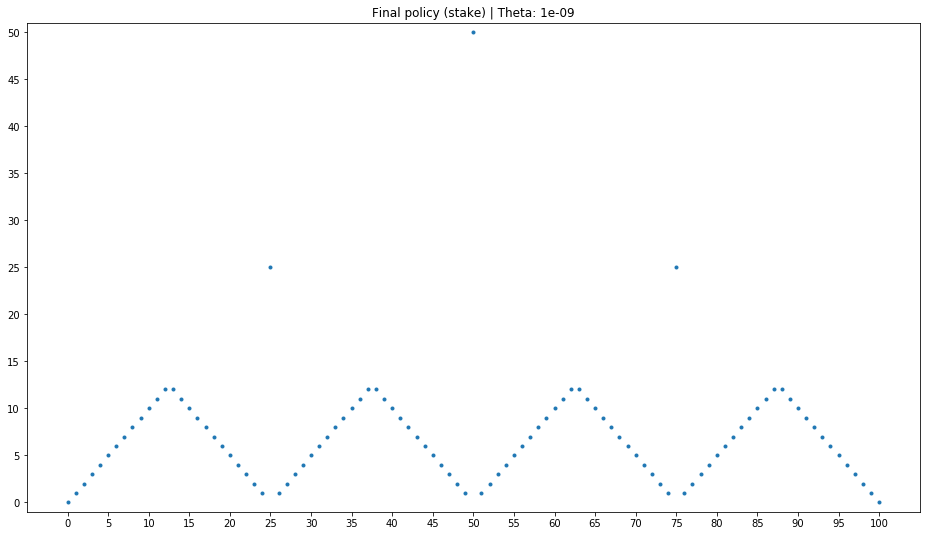

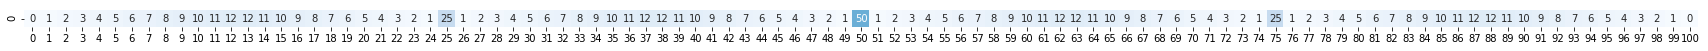

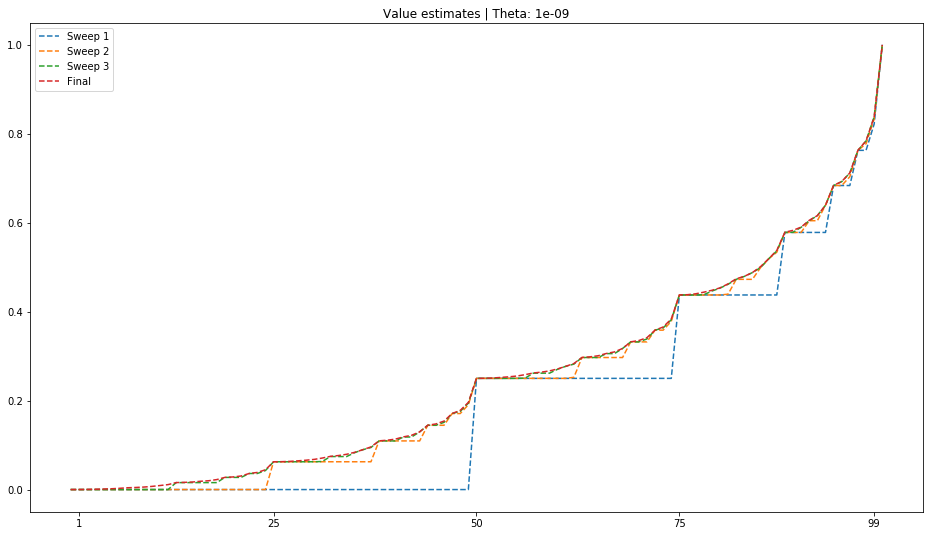

In [12]:
for theta in thetas:
    run_value_iter(prob=0.25)

#### $p_{h} = 0.55$

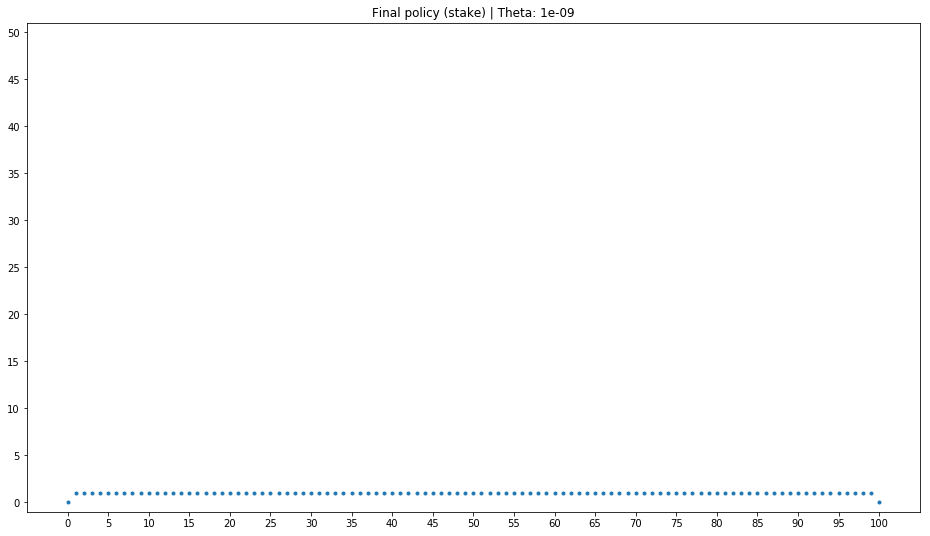

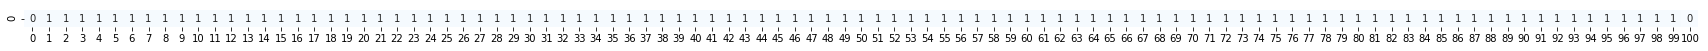

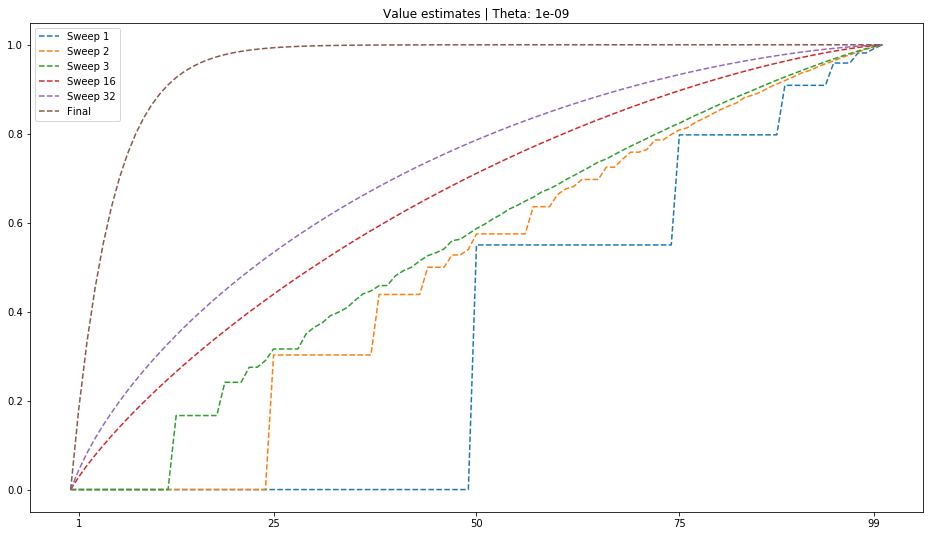

In [13]:
for theta in thetas:
    run_value_iter(prob=0.55)